Distribuição de probabilidade
=============================



## O retorno do experimento da moeda



Considere o experimento de lançar uma moeda e observar a face que ela apresenta ao cair na sua mão. Temos que o espaço amostral é $\Omega = \{\textrm{Cara}, \textrm{Coroa}\}$. Vamos definir a variável aleatória $X$ tal que $X(\textrm{Cara})=0$ e $X(\textrm{Coroa})=1$. Outra forma de definir a variável aleatória $X$ é:

$$
X=\begin{cases}
0 & \textrm{se cair "cara"} \\
1 & \textrm{se cair "coroa"}
\end{cases}
$$

Observe que a variável aleatória $X$ é *discreta* (ela pode apenas assumir um número finito de valores).

Vamos simular o experimento proposto com $N=1000$ lançamentos da moeda para ver o que acontece (fizemos algo similar no notebook 3 sobre simulação).



Text(0, 0.5, 'Quantidade')

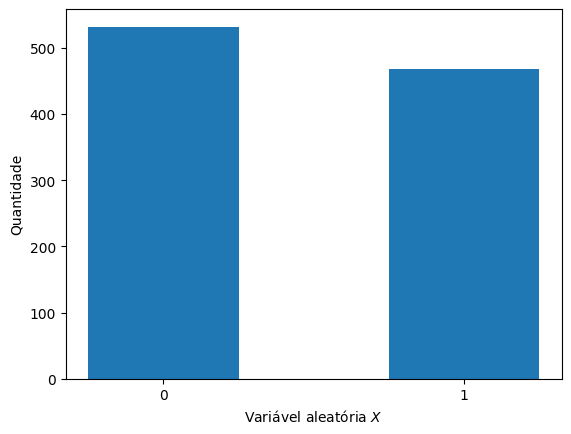

In [1]:
import random as rd
import matplotlib.pyplot as plt


def jogar_moeda():
    return rd.choice(["cara", "coroa"])


def experimento(n):
    resultado_global = []
    for _ in range(n):
        resultado_local = jogar_moeda()
        if resultado_local == "cara":
            resultado_global.append(0)
        else:
            resultado_global.append(1)
    return resultado_global


NUM_REPETICOES = 1000
resultado = experimento(NUM_REPETICOES)

figura, eixo = plt.subplots()
eixo.hist(resultado, bins=range(3), align="left", rwidth=0.5)
eixo.set_xticks(range(2))
eixo.set_xlabel("Variável aleatória $X$")
eixo.set_ylabel("Quantidade")

## Distribuição de probabilidades



Uma *distribuição de probabilidades* mostra a probabilidade de cada evento ocorrer. Como a probabilidade total dos eventos deve ser igual a 1 pelo segundo axioma de Kolmogorov, podemos representar facilmente o resultado acima em uma distribuição de probabilidades passando o argumento `density=True` na hora de plotar.



Text(0, 0.5, '$p(x)$')

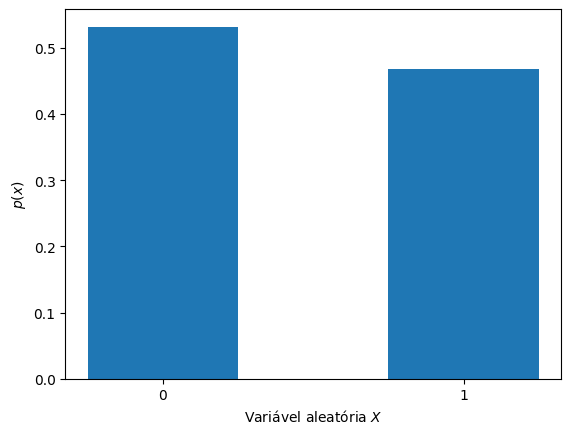

In [2]:
figura, eixo = plt.subplots()
contagem, caixas, _ = eixo.hist(
    resultado,
    bins=range(3),
    align="left",
    rwidth=0.5,
    density=True,  # mudamos este argumento
)
eixo.set_xticks(range(2))
eixo.set_xlabel("Variável aleatória $X$")
eixo.set_ylabel("$p(x)$")

Observe também que além de plotar o gráfico nós também podemos recuperar as informações do histograma nas variáveis `contagem` e `caixas`.



In [3]:
print("X", "Probabilidade", sep="\t")
for cx, cont in zip(caixas, contagem):
    print(cx, cont, sep="\t")

X	Probabilidade
0.0	0.532
1.0	0.468


O resultado obtido nos mostra que nossa simulação apresentou que a probabilidade $P(X=0)$ e a probabilidade $P(X=1)$ são de fato próximas de 1/2 (podemos escrever $p(0)$ para representar $P(X=0)$ e $p(1)$ para representar $P(X=1)$ para simplificar). Como é uma simulação nós sabemos que o valor não será necessariamente o valor 1/2 pela natureza probabilística da simulação, mas que se aproxima deste valor quanto maior for o número $N$ de repetições do experimento.

O que acontece se tivéssemos uma moeda viciada? Vamos simular um experimento onde temos uma moeda viciada.



X	Probabilidade
0.0	0.162
1.0	0.838
-------
Os pesos eram: [0.15129321945088692, 0.8487067805491131]


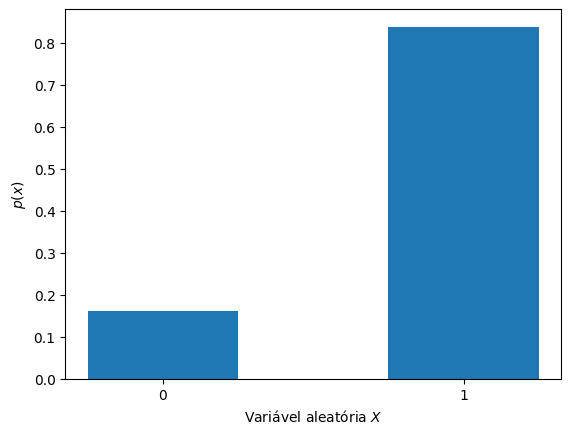

In [4]:
CHANCE_CARA = rd.random()
pesos = [CHANCE_CARA, 1 - CHANCE_CARA]

def jogar_moeda_viciada():
    return rd.choices(["cara", "coroa"], weights=pesos)[0]


def experimento(n):
    resultado_global = []
    for _ in range(n):
        resultado_local = jogar_moeda_viciada()
        if resultado_local == "cara":
            resultado_global.append(0)
        else:
            resultado_global.append(1)
    return resultado_global


NUM_REPETICOES = 1000
resultado = experimento(NUM_REPETICOES)

figura, eixo = plt.subplots()
contagem, caixas, _ = eixo.hist(
    resultado,
    bins=range(3),
    align="left",
    rwidth=0.5,
    density=True,
)
eixo.set_xticks(range(2))
eixo.set_xlabel("Variável aleatória $X$")
eixo.set_ylabel("$p(x)$")

print("X", "Probabilidade", sep="\t")
for cx, cont in zip(caixas, contagem):
    print(cx, cont, sep="\t")

print("-------")
print("Os pesos eram:", pesos)

A distribuição de probabilidades de uma variável discreta também é conhecida como *função massa de probabilidade* (ou probability mass function em inglês, pmf).



## Função de distribuição acumulada



Veja na tabela abaixo a distribuição de tipos sanguíneos no Brasil segundo a [Wikipedia](https://en.wikipedia.org/wiki/Blood_type_distribution_by_country).

| x|O+|A+|B+|AB+|O−|A−|B−|AB−|
|---|---|---|---|---|---|---|---|---|
| p(x)|36.0%|34.0%|8.0%|2.5%|9.0%|8.0%|2.0%|0.5%|

Vamos plotar uma distribuição destas probabilidades.



Text(0, 0.5, '$p(x)$')

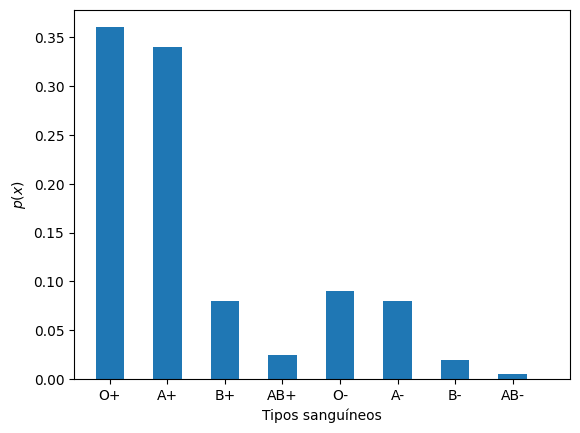

In [5]:
tipo = ["O+", "A+", "B+", "AB+", "O-", "A-", "B-", "AB-"]
prob = [36, 34, 8, 2.5, 9, 8, 2, 0.5]

figura, eixo = plt.subplots()
contagem, caixas, _ = eixo.hist(
    range(len(tipo)),
    weights=prob,
    bins=range(len(tipo)+1),
    align="left",
    rwidth=0.5,
    density=True,
)
eixo.set_xlim(right=len(tipo))
eixo.set_xticks(range(len(tipo)))
eixo.set_xticklabels(tipo)

eixo.set_xlabel("Tipos sanguíneos")
eixo.set_ylabel("$p(x)$")

A *função de distribuição acumulada* $F(x)$ de uma variável discreta $X$ com uma função massa de probabilidade $p(x)$ é definida como

$$
F(x) = P(X \leq x) = \sum_{y:y\leq x} p(y).
$$

Vamos ver como fica a função de distribuição acumulada dos tipos sanguíneos.



Text(0, 0.5, '$F(x)$')

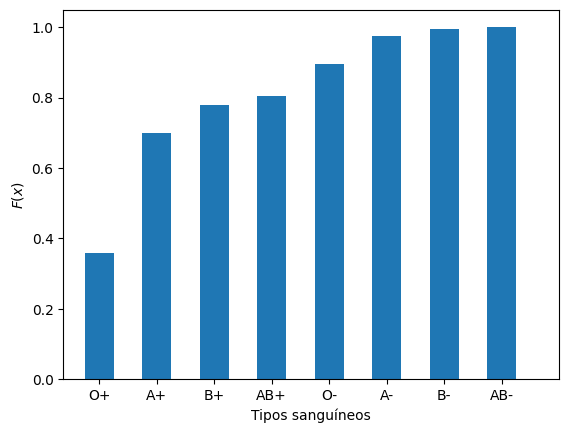

In [6]:
figura, eixo = plt.subplots()
contagem, caixas, _ = eixo.hist(
    range(len(tipo)),
    weights=prob,
    bins=range(len(tipo)+1),
    align="left",
    rwidth=0.5,
    density=True,
    cumulative=True,  # adicionamos este argumento
)
eixo.set_xlim(right=len(tipo))
eixo.set_xticks(range(len(tipo)))
eixo.set_xticklabels(tipo)

eixo.set_xlabel("Tipos sanguíneos")
eixo.set_ylabel("$F(x)$")

Na função de distribuição acumulada, cada barra indica a probabilidade do evento ocorrer ou qualquer outro evento que estiver a sua esquerda. Neste tipo de visualização fica fácil de responder a pergunta: qual a probabilidade de uma pessoa brasileira sorteada ao acaso ter tipo sanguíneo O+, A+, B+ ou AB+ (isto é, fator Rh positivo)? Observe que, neste gráfico, este valor é justamente o valor da $F(x=\textrm{AB+})$, que equivale a aproximadamente 80%.

Observe que necessariamente o valor de $F(x)$ do item mais a direita do gráfico deve ser igual a 1 para satisfazer o segundo axioma de Kolmogorov.

Outro problema: qual é a probabilidade de encontrar um brasileiro com tipo sanguíneo B+, AB+, O- ou A-? Este valor é igual a $F(x=\textrm{A-})-F(x=\textrm{A+})$. Consegue observar o porquê?



## Distribuição uniforme



Vamos considerar um dado de 6 faces onde todas as faces tem a mesma chance de saírem após uma rolagem.

| x|1|2|3|4|5|6|
|---|---|---|---|---|---|---|
| p(x)|1/6|1/6|1/6|1/6|1/6|1/6|



Text(0, 0.5, '$p(x)$')

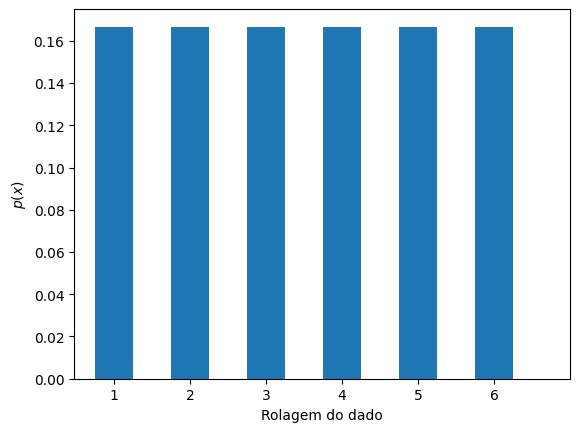

In [7]:
dado = [1, 2, 3, 4, 5, 6]
prob = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

figura, eixo = plt.subplots()
contagem, caixas, _ = eixo.hist(
    range(len(dado)),
    weights=prob,
    bins=range(len(dado) + 1),
    align="left",
    rwidth=0.5,
    density=True,
)
eixo.set_xlim(right=len(dado))
eixo.set_xticks(range(len(dado)))
eixo.set_xticklabels(dado)

eixo.set_xlabel("Rolagem do dado")
eixo.set_ylabel("$p(x)$")

A distribuição de probabilidades deste dado não-viciado que acabamos de ver faz parte de uma família de distribuições conhecidas como *distribuições uniformes*. Uma distribuição é chamada de uniforme se apresenta valor de $p(x)$ igual para *todos* os resultados do seu espaço amostral e valor de $p(x)=0$ para todos os resultados que não estão no seu espaço amostral (por exemplo, o valor de $p(8)$ para o dado de seis faces é zero, pois o valor 8 não está no espaço amostral deste dado).



## Valor esperado



No notebook 2, o conceito de valor esperado foi apresentado de maneira bastante simplificada. Na ocasião, consideramos que o valor esperado de uma variável aleatória era simplesmente a média aritmética dos valores desta variável. Este, na verdade, é um resultado particular quando a variável aleatória é discreta e segue uma distribuição uniforme.

Para uma variável discreta $X$ qualquer (não precisa seguir uma distribuição uniforme), o valor esperado $E[X]$ é calculado da seguinte maneira

$$
E[X] = \sum_{x \in \Omega} x \cdot p(x) \equiv \mu_X.
$$

Ou seja, se a variável $X$ é discreta, seu valor esperado será a média ponderada de cada valor do espaço amostral (isto é, o valor da variável multiplicado pela respectiva probabilidade). Este valor é igual à média aritmética caso a variável $X$ siga uma distribuição uniforme.

Vamos implementar uma função que computa o valor esperado de uma variável aleatória discreta.



In [8]:
def valor_esperado(valores, probabilidades):
    """Computa o valor esperado para uma variável aleatória discreta."""

    ponderados = []

    for val, prob in zip(valores, probabilidades):
        ponderados.append(val * prob)

    return sum(ponderados)

Podemos checar a definição para o nosso dado de 6 faces não-viciado.



In [9]:
import statistics as st

dado = [1, 2, 3, 4, 5, 6]
prob = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

v_esperado = valor_esperado(dado, prob)

print(v_esperado)
print(st.mean(dado))  # só funciona neste caso pois a distribuição é uniforme!

3.5
3.5


Muito cuidado ao interpretar o valor esperado! O valor esperado de 3,5 não representa nenhuma face do dado, logo não estamos &ldquo;esperando que o dado resulte em 3,5&rdquo;. O valor esperado é para ser entendido como o valor médio após diversas jogadas do dado.

E se nosso dado fosse viciado? Vamos testar!

| x|1|2|3|4|5|6|
|---|---|---|---|---|---|---|
| p(x)|2/6|0|1/6|2/6|0|1/6|



In [10]:
dado = [1, 2, 3, 4, 5, 6]
prob = [2/6, 0, 1/6, 2/6, 0, 1/6]

v_esperado = valor_esperado(dado, prob)

print(v_esperado)
print(st.mean(dado), "<- problema")  # não representa mais o valor esperado!
print(st.mean(rd.choices(dado, prob)[0] for _ in range(10000))) # simulação

3.1666666666666665
3.5 <- problema
3.1698


Considere $a$ e $b$ como constantes e observe algumas propriedades do valor esperado:

$$
E[a \cdot X] = a \cdot E[X]
$$

$$
E[X + b] = E[X] + b
$$



## Variância



No notebook 1, o conceito de variância de uma variável aleatória foi abordado. Podemos também computar a variância de uma distribuição de probabilidades. A formulação é:

$$
\mathrm{Var}(X) = E[(X-\mu_X)^2]
$$

Vamos ver o conceito aplicado à uma distribuição uniforme.



In [11]:
import numpy as np

dado = np.array([1., 2., 3., 4., 5., 6.])
prob = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

v_esperado = valor_esperado(dado, prob)
variancia = valor_esperado((dado - v_esperado)**2, prob)

print(variancia)
print(st.pvariance(dado))  # funciona pois é uma distribuição uniforme

2.9166666666666665
2.9166666666666665


Vamos ver o conceito aplicado à uma distribuição que não é uniforme.



In [12]:
dado = np.array([1., 2., 3., 4., 5., 6.])
prob = [2/6, 0, 1/6, 2/6, 0, 1/6]

v_esperado = valor_esperado(dado, prob)
variancia = valor_esperado((dado - v_esperado)**2, prob)

print(variancia)
print(st.pvariance(dado), "<- problema!")  # não funciona pois não é uniforme

3.1388888888888884
2.9166666666666665 <- problema!


Outra forma equivalente de se computar a variância é

$$
\mathrm{Var}(X) = E[X^2] - (E[X])^2
$$

Vamos testar!



In [13]:
dado = np.array([1., 2., 3., 4., 5., 6.])
prob = [2/6, 0, 1/6, 2/6, 0, 1/6]

v_esperado = valor_esperado(dado, prob)
variancia_metodo1 = valor_esperado((dado - v_esperado)**2, prob)

v_esperado_2 = valor_esperado(dado**2, prob)
variancia_metodo2 = v_esperado_2 - v_esperado**2

print(variancia_metodo1)
print(variancia_metodo2)

3.1388888888888884
3.1388888888888893


## Distribuição binomial



Um experimento que segue as condições de 1 a 4 abaixo é denominado *experimento binomial* (ver capítulo 3.4 da referência [1]):

1.  O experimento consiste em realizar uma sequência de $n$ ensaios, onde $n$ é fixado com antecedência;

2.  Cada ensaio pode resultar em apenas um de dois resultados possíveis. Na literatura, é comum chamar um dos resultados de *Sucesso* ($S$) e o outro de *Falha* ($F$). Exemplo: você pode atribuir o rótulo $S$ para quando tira cara na moeda e o rótulo $F$ para quando tira coroa;

3.  Os ensaios são independentes. O resultado de um ensaio não influencia o resultado de qualquer outro ensaio;

4.  A probabilidade de sucesso $P(S)$ é constante de um ensaio para outro.

<u>Exemplo 1</u>

O experimento de jogar uma moeda 3 vezes e registrar a quantidade de vezes que tiramos cara é um experimento binomial. Vamos checar:

1.  O experimento consiste em realizar 3 ensaios (3 jogadas da moeda);

2.  Cada ensaio pode resultar em dois resultados possíveis: cara ou coroa. Podemos atribuir o rótulo $S$ para tirar cara e o rótulo $F$ para tirar coroa;

3.  Cada jogar da moeda é independente dos demais. O resultado de um lançamento não afeta o resultado do lançamento seguinte;

4.  A probabilidade de sucesso $P(S)$ é constante e é dada pela probabilidade de tirar cara na moeda (pode ser uma moeda viciada ou não-viciada, tanto faz).

Vamos chamar de $p$ a probabilidade de de sucesso (isto é, $P(S)=p$). Como existem apenas duas possibilidades de resultado, sabemos pelo complementar que $P(F) = 1-p$.

A tabela abaixo mostra todas as situações possíveis que temos neste experimento.

| Resultado|x (número de sucessos)|Probabilidade|
|---|---|---|
| SSS|3|$p^3$|
| SSF|2|$p^2(1-p)$|
| SFS|2|$p^2(1-p)$|
| FSS|2|$p^2(1-p)$|
| SFF|1|$p(1-p)^2$|
| FSF|1|$p(1-p)^2$|
| FFS|1|$p(1-p)^2$|
| FFF|0|$(1-p)^3$|

Observe que existem 3 resultados onde $x=2$ e onde $x=1$, porém temos apenas 1 resultado onde $x=3$ e $x=0$. Logo, se a ordem do lançamento das moedas não é uma informação relevante, temos que as probabilidades para cada resultado de $x$ são:

| x (número de sucessos)|Probabilidade|
|---|---|
| 3|$p^3$|
| 2|$3 \cdot p^2(1-p)$|
| 1|$3 \cdot p(1-p)^2$|
| 0|$(1-p)^3$|

Esta é a distribuição de probabilidades binomial. A versão generalizada desta distribuição é:

$$
b(x;n,p)=\begin{cases}
\binom{n}{x}p^{x}(1-p)^{n-x} & x=0,1,2,\ldots,n\\
0 & \textrm{caso contrário}
\end{cases}
$$

Vamos ver uma implementação em código.



X	Probabilidade
0	0.125
1	0.375
2	0.375
3	0.125


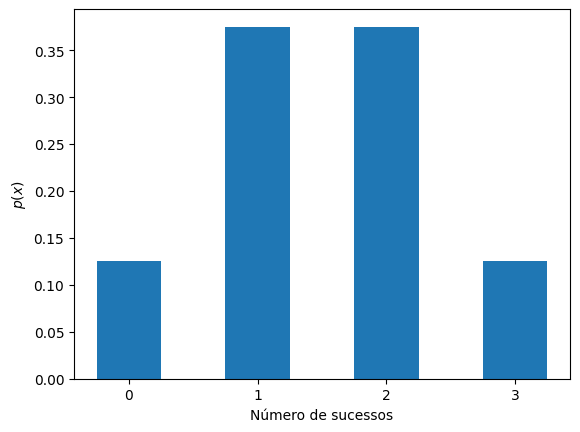

In [14]:
from math import comb

NUM_ENSAIOS = 3
PROB_SUCESSO = 0.5
num_sucessos = list(range(NUM_ENSAIOS + 1))

b = []
for x in num_sucessos:
    binomio = comb(NUM_ENSAIOS, x)
    prob = PROB_SUCESSO ** x * (1 - PROB_SUCESSO) ** (NUM_ENSAIOS - x)
    b.append(binomio * prob)

figura, eixo = plt.subplots()
contagem, caixas, _ = eixo.hist(
    num_sucessos,
    weights=b,
    bins=range(len(num_sucessos) + 1),
    align="left",
    rwidth=0.5,
    density=True,
)

eixo.set_xticks(num_sucessos)
eixo.set_xlabel("Número de sucessos")
eixo.set_ylabel("$p(x)$")

print("X", "Probabilidade", sep="\t")
for cx, cont in zip(caixas, contagem):
    print(int(cx), cont, sep="\t")

## Distribuição de Poisson



&ldquo;[&#x2026;] a distribuição de Poisson é uma distribuição de probabilidade discreta que expressa a probabilidade de um determinado número de eventos ocorrer em um intervalo fixo de tempo ou espaço se esses eventos ocorrerem com uma taxa média constante conhecida e independentemente do tempo desde o último evento.&rdquo; [4]

A distribuição de Poisson tem a seguinte expressão

$$
f(x;\mu) = \frac{e^{-\mu}\mu^x}{x!}\;x=0,1,2,3,\ldots
$$

O código abaixo pode ser utilizado para gerar diferentes distribuições de Poisson.



Text(0, 0.5, '$p(x)$')

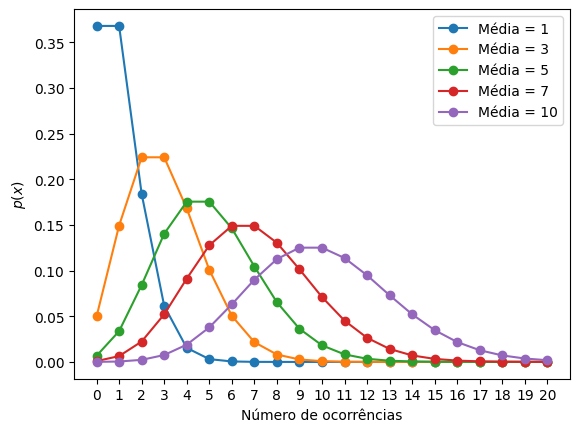

In [15]:
from math import exp, factorial

MAX_X = 20
MEDIAS = [1, 3, 5, 7, 10]
num_ocorrencias = list(range(MAX_X + 1))

figura, eixo = plt.subplots()

for media in MEDIAS:
    prob = [exp(-media) * media**x / factorial(x) for x in num_ocorrencias]

    eixo.plot(
        num_ocorrencias,
        prob,
        marker="o",
        label=f"Média = {media}",
    )

eixo.legend()
eixo.set_xticks(num_ocorrencias)
eixo.set_xlabel("Número de ocorrências")
eixo.set_ylabel("$p(x)$")

Diversos fenômenos podem ser modelados com a distribuição de Poisson, incluindo [4]:

-   número de meteoritos maiores que 1 metro de diâmetro que atingem a Terra;

-   número de fótons que atingem um detector em um certo intervalo de tempo em um experimento com laser;

-   número de partículas emitidas por uma fonte de material radioativo por unidade de tempo.

Uma propriedade relevante de distribuições de Poisson é:

$$
E(X) = \mathrm{Var}(X) = \mu_X.
$$

Exemplo da referência [5]: &ldquo;Uma situação prática de interesse na qual a distribuição de Poisson é empregada diz respeito à desintegração de substâncias radioativas. Considere o urânio 238 (U238), por exemplo. Cada núcleo de U238 tem uma probabilidade muito pequena, $4,9 \times 10^{-18}$ de se desintegrar, emitindo uma partícula $\alpha$, em um segundo. Considere, agora, um número grande $n$ de núcleos e a variável aleatória $N$ = número de núcleos que se desintegram. Admitindo-se que a desintegração de um núcleo não afeta a probabilidade de desintegração de qualquer outro núcleo (independência), a variável aleatória $N$ tem uma distribuição binomial, com parâmetros $n$ e $p$, este dado pelo valor acima. Logo, estamos numa situação em que podemos [&#x2026;] aproximar probabilidades binomiais por probabilidades de Poisson.&rdquo; (considerando que $\mu=n p$)



## XKCD relevante



![img](https://imgs.xkcd.com/comics/prediction.png)

`Imagem: Prediction (XKCD) disponível em https://xkcd.com/2370`



## Referências



1.  DEVORE, Jay L. Probabilidade E Estatística Para Engenharia E Ciências. Tradução Da 9ª Edição Norte-Americana. Cengage Learning, 2018.

2.  Distribuição de tipos sanguíneos no mundo [https://en.wikipedia.org/wiki/Blood_type_distribution_by_country](https://en.wikipedia.org/wiki/Blood_type_distribution_by_country)

3.  Sobre experimentos binomiais [https://www.statology.org/binomial-experiment/](https://www.statology.org/binomial-experiment/)

4.  Distribuição de Poisson [https://pt.wikipedia.org/wiki/Distribui%C3%A7%C3%A3o_de_Poisson](https://pt.wikipedia.org/wiki/Distribui%C3%A7%C3%A3o_de_Poisson)

5.  MORETTIN, Pedro A.; BUSSAB, Wilton de O. Estatística básica. 9ª edição.: Saraiva Uni, 2017.

